___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df= pd.read_csv("Churn_Modelling.csv",index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.shape

(10000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum().any()

False

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [8]:
df.drop(['CustomerId','Surname'],axis=1, inplace=True)

In [9]:
print(df.Exited.value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


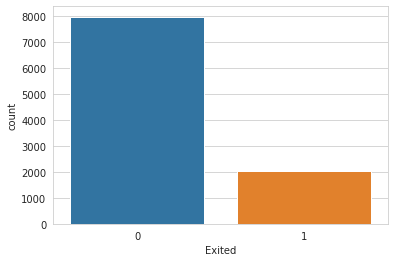

In [10]:
sns.countplot(df["Exited"]);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a86926710>,
      dtype=object)

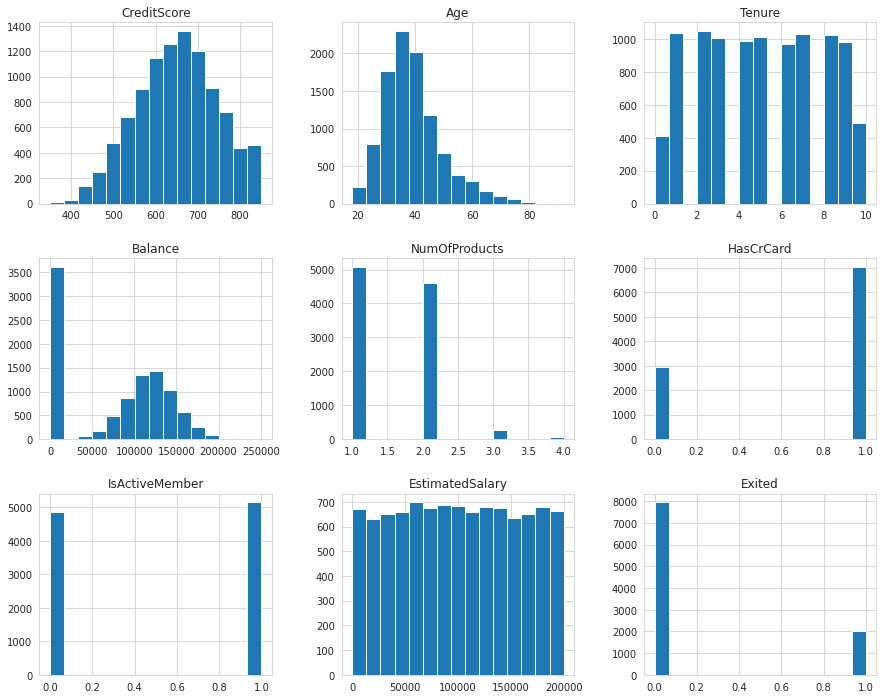

In [11]:
df.hist(figsize=(15, 12), bins=15)

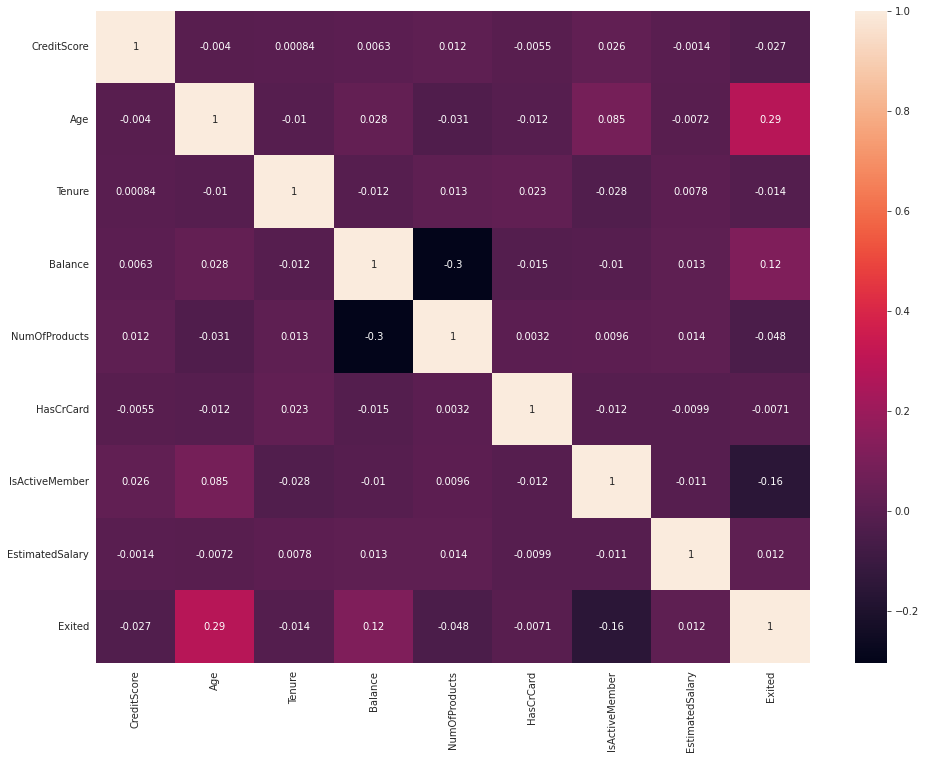

In [12]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True);

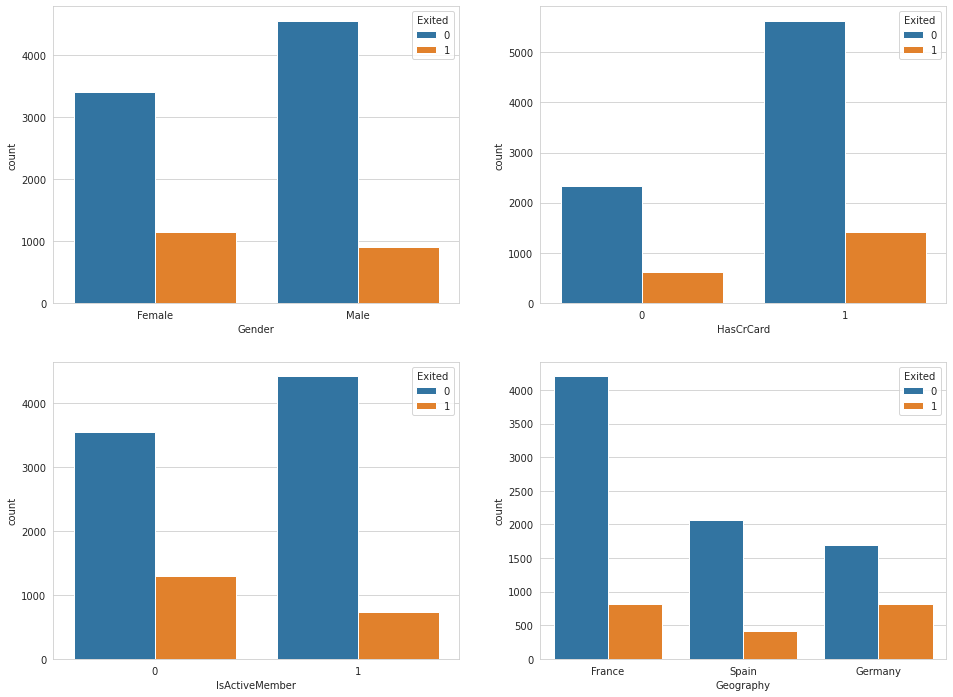

In [13]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

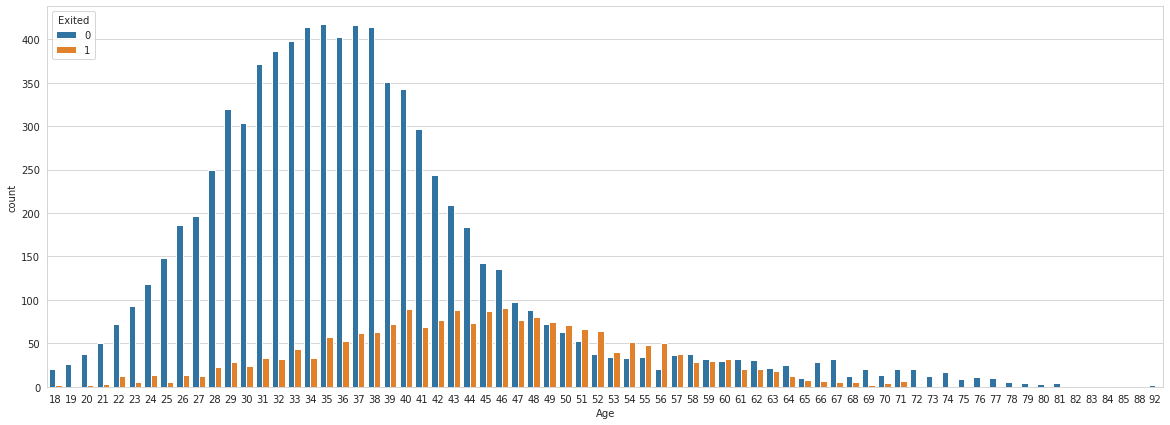

In [14]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

In [15]:
df = pd.get_dummies(df, drop_first=True)
df.head(7)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
2,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
3,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
4,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
5,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0
6,645,44,8,113755.780,2,1,0,149756.710,1,0,1,1
7,822,50,7,0.000,2,1,1,10062.800,0,0,0,1


# Preprocessing of Data
- Train | Test Split, Scalling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values
seed = 23
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)  

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [23]:
X_train.shape

(9000, 11)

In [24]:
from tensorflow.keras.optimizers import Adam

In [27]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [29]:
model.fit(x = X_train, y = y_train, validation_split = 0.10, batch_size = 256, epochs =400 )

Epoch 1/400
32/32 [==============================] - 1s 11ms/step - loss: 0.5495 - recall: 0.0024 - val_loss: 0.4962 - val_recall: 0.0000e+00
Epoch 2/400
32/32 [==============================] - 0s 2ms/step - loss: 0.5039 - recall: 0.0000e+00 - val_loss: 0.4739 - val_recall: 0.0000e+00
Epoch 3/400
32/32 [==============================] - 0s 3ms/step - loss: 0.4890 - recall: 0.0000e+00 - val_loss: 0.4631 - val_recall: 0.0000e+00
Epoch 4/400
32/32 [==============================] - 0s 3ms/step - loss: 0.4807 - recall: 0.0000e+00 - val_loss: 0.4529 - val_recall: 0.0000e+00
Epoch 5/400
32/32 [==============================] - 0s 2ms/step - loss: 0.4734 - recall: 0.0090 - val_loss: 0.4449 - val_recall: 0.0286
Epoch 6/400
32/32 [==============================] - 0s 3ms/step - loss: 0.4669 - recall: 0.0483 - val_loss: 0.4393 - val_recall: 0.0800
Epoch 7/400
32/32 [==============================] - 0s 3ms/step - loss: 0.4608 - recall: 0.0736 - val_loss: 0.4328 - val_recall: 0.1029
Epoch 8/400


In [30]:
model.weights

[<tf.Variable 'dense_9/kernel:0' shape=(11, 16) dtype=float32, numpy=
 array([[-4.78386432e-02, -3.40177357e-01,  3.28440666e-01,
         -4.30895612e-02, -1.24094911e-01, -2.02710181e-02,
         -8.88176784e-02,  1.98098823e-01,  2.39225745e-01,
          5.55973537e-02, -2.00296789e-02,  1.46381259e-01,
          8.03966299e-02,  2.25568321e-02,  4.48912323e-01,
          1.47705888e-02],
        [ 5.38046002e-01,  5.60866475e-01, -1.09039538e-01,
          1.66270494e+00, -8.40723217e-02, -4.90823925e-01,
          1.23100245e+00,  2.20428526e-01,  5.45666277e-01,
          7.17700481e-01, -1.11915156e-01, -2.86267459e-01,
          5.21711893e-02,  1.15243107e-01, -2.23712847e-01,
         -3.52602184e-01],
        [ 1.30243272e-01,  5.67519724e-01, -1.18911177e-01,
         -1.47757381e-01,  4.86131012e-01, -1.20001569e-01,
          3.07416797e-01,  3.93676609e-01, -7.02997968e-02,
          9.06000137e-02,  2.84356661e-02,  3.68452936e-01,
          1.76975533e-01,  9.5184348

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                192       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 4)                 36        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [32]:
pd.DataFrame(model.history.history)

,loss,recall,val_loss,val_recall
0,0.550,0.002,0.496,0.000
1,0.504,0.000,0.474,0.000
2,0.489,0.000,0.463,0.000
3,0.481,0.000,0.453,0.000
4,0.473,0.009,0.445,0.029
...,...,...,...,...
395,0.325,0.498,0.331,0.503
396,0.325,0.510,0.328,0.469
397,0.326,0.506,0.328,0.469
398,0.326,0.513,0.328,0.434


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

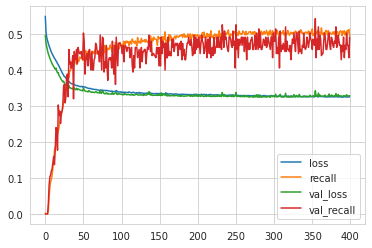

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [34]:
model.evaluate(X_test, y_test, verbose=0)

[0.3291889727115631, 0.5]

In [35]:

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[760  36]
 [102 102]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       796
           1       0.74      0.50      0.60       204

    accuracy                           0.86      1000
   macro avg       0.81      0.73      0.76      1000
weighted avg       0.85      0.86      0.85      1000



# ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

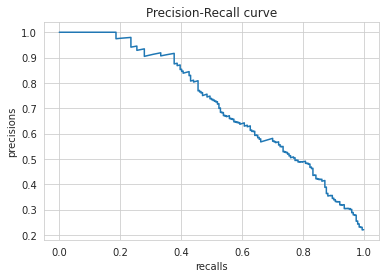

In [36]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [37]:
average_precision_score(y_test, y_pred_proba)

0.7164690323593597

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [38]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [39]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [41]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=50)

In [42]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.10,
          batch_size=256,
          epochs=400,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/400
32/32 [==============================] - 1s 11ms/step - loss: 0.6925 - recall: 0.3504 - val_loss: 0.6543 - val_recall: 0.6400
Epoch 2/400
32/32 [==============================] - 0s 3ms/step - loss: 0.6704 - recall: 0.6122 - val_loss: 0.6262 - val_recall: 0.6286
Epoch 3/400
32/32 [==============================] - 0s 3ms/step - loss: 0.6597 - recall: 0.6236 - val_loss: 0.6272 - val_recall: 0.6971
Epoch 4/400
32/32 [==============================] - 0s 3ms/step - loss: 0.6495 - recall: 0.6242 - val_loss: 0.6224 - val_recall: 0.7200
Epoch 5/400
32/32 [==============================] - 0s 3ms/step - loss: 0.6387 - recall: 0.6562 - val_loss: 0.6160 - val_recall: 0.7200
Epoch 6/400
32/32 [==============================] - 0s 3ms/step - loss: 0.6291 - recall: 0.6671 - val_loss: 0.6271 - val_recall: 0.7543
Epoch 7/400
32/32 [==============================] - 0s 3ms/step - loss: 0.6200 - recall: 0.6701 - val_loss: 0.6273 - val_recall: 0.7657
Epoch 8/400
32/32 [=====================

In [43]:
model.weights

[<tf.Variable 'dense_13/kernel:0' shape=(11, 16) dtype=float32, numpy=
 array([[-6.22992367e-02, -2.52175510e-01,  3.98422837e-01,
         -2.24197432e-01, -3.59183624e-02, -5.76284993e-03,
         -1.23117834e-01, -1.19030075e-02,  1.44429967e-01,
          1.00703269e-01, -3.56038548e-02,  1.49180904e-01,
          6.66300207e-02, -9.79189798e-02,  3.83685291e-01,
          1.36187077e-01],
        [ 3.56062829e-01,  5.66258013e-01, -4.24113393e-01,
          1.10293543e+00, -7.11555004e-01, -4.44923371e-01,
          8.82776439e-01,  9.38980401e-01,  6.26419008e-01,
          7.36157358e-01, -5.57811372e-02, -3.05361181e-01,
          3.91397439e-02,  5.80651462e-02, -1.34777308e-01,
         -3.43201756e-01],
        [ 2.27512438e-02,  4.99928832e-01, -3.75680089e-01,
         -4.15392071e-02,  4.88440633e-01, -2.11145058e-01,
          1.85064182e-01,  1.64800420e-01, -1.48687154e-01,
         -1.31717336e-03,  3.51052061e-02,  5.13948858e-01,
          1.44199863e-01,  1.824478

In [44]:
pd.DataFrame(model.history.history)

,loss,recall,val_loss,val_recall
0,0.693,0.350,0.654,0.640
1,0.670,0.612,0.626,0.629
2,0.660,0.624,0.627,0.697
3,0.650,0.624,0.622,0.720
4,0.639,0.656,0.616,0.720
...,...,...,...,...
138,0.453,0.774,0.448,0.783
139,0.453,0.759,0.492,0.811
140,0.453,0.766,0.447,0.771
141,0.453,0.764,0.440,0.771


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

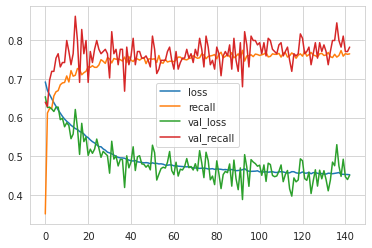

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [46]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[621 175]
 [ 43 161]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       796
           1       0.48      0.79      0.60       204

    accuracy                           0.78      1000
   macro avg       0.71      0.78      0.72      1000
weighted avg       0.84      0.78      0.80      1000



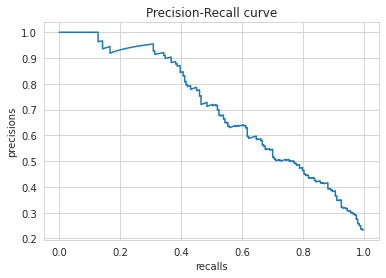

In [47]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [48]:
from tensorflow.keras.optimizers import Adam

In [49]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'binary_crossentropy',metrics=["Recall"])

In [50]:
model.fit(x = X_train, y = y_train, validation_split = 0.10, batch_size = 256, epochs = 400)

Epoch 1/400
32/32 [==============================] - 2s 26ms/step - loss: 0.5495 - recall: 0.0024 - val_loss: 0.4962 - val_recall: 0.0000e+00
Epoch 2/400
32/32 [==============================] - 0s 8ms/step - loss: 0.5039 - recall: 0.0000e+00 - val_loss: 0.4739 - val_recall: 0.0000e+00
Epoch 3/400
32/32 [==============================] - 0s 7ms/step - loss: 0.4890 - recall: 0.0000e+00 - val_loss: 0.4631 - val_recall: 0.0000e+00
Epoch 4/400
32/32 [==============================] - 0s 4ms/step - loss: 0.4807 - recall: 0.0000e+00 - val_loss: 0.4529 - val_recall: 0.0000e+00
Epoch 5/400
32/32 [==============================] - 0s 6ms/step - loss: 0.4734 - recall: 0.0090 - val_loss: 0.4449 - val_recall: 0.0286
Epoch 6/400
32/32 [==============================] - 0s 7ms/step - loss: 0.4669 - recall: 0.0483 - val_loss: 0.4393 - val_recall: 0.0800
Epoch 7/400
32/32 [==============================] - 0s 6ms/step - loss: 0.4608 - recall: 0.0736 - val_loss: 0.4328 - val_recall: 0.1029
Epoch 8/400


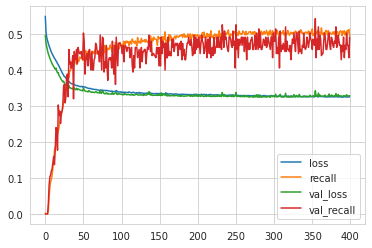

In [51]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [52]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3291889727115631
recall :  0.5


In [53]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[760  36]
 [102 102]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       796
           1       0.74      0.50      0.60       204

    accuracy                           0.86      1000
   macro avg       0.81      0.73      0.76      1000
weighted avg       0.85      0.86      0.85      1000



### Add Dropout Layer

In [54]:
from tensorflow.keras.layers import Dropout

In [55]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'binary_crossentropy',metrics=["Recall"])

In [56]:
model.fit(x = X_train, y = y_train, validation_split = 0.10, batch_size = 256, epochs = 400)

Epoch 1/400
32/32 [==============================] - 2s 17ms/step - loss: 0.5653 - recall: 0.0501 - val_loss: 0.4994 - val_recall: 0.0000e+00
Epoch 2/400
32/32 [==============================] - 0s 5ms/step - loss: 0.5467 - recall: 0.0139 - val_loss: 0.4843 - val_recall: 0.0000e+00
Epoch 3/400
32/32 [==============================] - 0s 5ms/step - loss: 0.5307 - recall: 0.0072 - val_loss: 0.4758 - val_recall: 0.0000e+00
Epoch 4/400
32/32 [==============================] - 0s 4ms/step - loss: 0.5233 - recall: 0.0066 - val_loss: 0.4682 - val_recall: 0.0000e+00
Epoch 5/400
32/32 [==============================] - 0s 4ms/step - loss: 0.5145 - recall: 0.0018 - val_loss: 0.4636 - val_recall: 0.0000e+00
Epoch 6/400
32/32 [==============================] - 0s 5ms/step - loss: 0.5087 - recall: 0.0030 - val_loss: 0.4613 - val_recall: 0.0000e+00
Epoch 7/400
32/32 [==============================] - 0s 5ms/step - loss: 0.5037 - recall: 0.0000e+00 - val_loss: 0.4568 - val_recall: 0.0000e+00
Epoch 8/

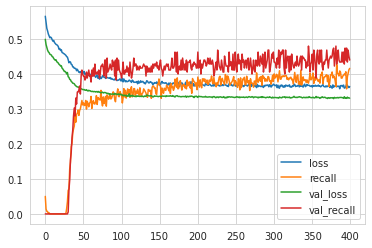

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [58]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.33626097440719604
recall :  0.5


### Add Early Stop

#### Monitor the "val_loss" as metric

In [59]:
early_stop = EarlyStopping(monitor = "val_loss", 
                           mode = "min", 
                           verbose = 1, 
                           patience = 50, 
                           restore_best_weights = True)

#### Monitor the "val_recall" as metric

In [60]:
early_stop_2 = EarlyStopping(monitor = "val_recall", 
                           mode = "min", 
                           verbose = 1, 
                           patience = 25, 
                           restore_best_weights = True)

## GridSearchCV

In [61]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adadelta, RMSprop, Nadam, Adam, SGD

In [63]:
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=4, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [64]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [ ]:
tf.random.set_seed(seed)

classifier = KerasClassifier(build_fn=build_classifier, epochs=400)
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, RMSprop, Nadam, Adadelta, SGD],
    'learn_rate': [0.001, 0.003, 0.005]
}
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=5).fit(X_train,
                                         y_train,
                                         class_weight=class_weights)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
#I waited over 50 mins for the grid_model, I wrote the rest, but couldn't run rest.

In [ ]:
grid_model.best_params_

In [ ]:
grid_model.best_score_

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = grid_model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

# Final Model and Model Deployment

In [ ]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=#will come from best params)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=#will come from best params,
          epochs=#???,
          verbose=1,
          class_weight=class_weights) 

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_churn.h5')

## Prediction

In [ ]:
pred_cust = df.drop('Exited', axis=1).iloc[0]
pred_cust

In [ ]:
pred_cust = scaler.transform(single_customer.values.reshape(-1, 11))
pred_cust

In [ ]:
y_pred =(model.predict(pred_cust) > 0.5).astype("int32")
y_pred

In [ ]:
df["Exited"].iloc[0]

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___